# MODEL TARINING AND TESTING

In [1]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv(r"C:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Drug_side_effect_predictor\projects_files\cleaned_dataset.csv")

In [5]:
# Converting string back to list
df['side_effect_categories'] = df['side_effect_categories'].apply(eval)


In [6]:
df.head(4)

,drug_name,medical_condition,drug_classes,activity,pregnancy_category,rating,no_of_reviews,side_effect_categories
0,1065,Acne,165,87.0,3,6.8,760.0,"[gastrointestinal, allergic, neurological, ren..."
1,2433,Acne,9,82.0,2,7.2,449.0,"[gastrointestinal, allergic, neurological, ren..."
2,1840,Acne,237,48.0,3,5.7,482.0,"[gastrointestinal, allergic, neurological, ren..."
3,25,Acne,167,41.0,5,7.9,623.0,"[gastrointestinal, neurological, renal, muscle..."


In [ ]:
# Encoding Targets
mlb = MultiLabelBinarizer()
y_side_effects = mlb.fit_transform(df['side_effect_categories'])

In [8]:
le_medical = LabelEncoder()
y_medical = le_medical.fit_transform(df['medical_condition'])

In [9]:
import os

# Ensuring the 'models' directory exists
os.makedirs("models", exist_ok=True)

# Saving encoders
joblib.dump(mlb, "models/side_effect_encoder.pkl")
joblib.dump(le_medical, "models/medical_condition_encoder.pkl")

['models/medical_condition_encoder.pkl']

In [10]:
# Preparing features
X = df.drop(columns=['side_effect_categories', 'medical_condition'])


In [11]:
# Combining both targets
import numpy as np
y_combined = np.hstack([y_side_effects, y_medical.reshape(-1, 1)])


In [12]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_combined, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import joblib

In [14]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "GaussianNB": GaussianNB()
}


In [ ]:
# Storing results
results = []

for name, model in models.items():
    try:
        print(f"\n🔍 Training {name}...")
        clf = MultiOutputClassifier(model)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        # Split the predictions
        y1_pred = y_pred[:, :-1]  # side effects (multi-label)
        y2_pred = y_pred[:, -1]   # medical condition (single-label)

        y1_true = y_test[:, :-1]
        y2_true = y_test[:, -1]

        # Evaluating
        f1_side = f1_score(y1_true, y1_pred, average='micro')
        f1_med = f1_score(y2_true, y2_pred, average='weighted')
        avg_f1 = (f1_side + f1_med) / 2

        print(f"✅ {name} - F1 Side Effects: {f1_side:.3f}, F1 Medical: {f1_med:.3f}, Avg: {avg_f1:.3f}")
        results.append((name, clf, f1_side, f1_med, avg_f1))

    except Exception as e:
        print(f" {name} failed: {e}")

# Creating DataFrame for comparison
df_results = pd.DataFrame(results, columns=["Model", "TrainedModel", "F1_Side_Effect", "F1_Medical", "Average_F1"])
df_results = df_results.sort_values(by="Average_F1", ascending=False)
print("\n📊 Model Performance:\n", df_results[["Model", "F1_Side_Effect", "F1_Medical", "Average_F1"]])



🔍 Training Logistic Regression...


c:\Users\IQRA SHAIKH\OneDrive\Documents\ml , nlp and DL complete\GitHub\Drug_side_effect_predictor\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression - F1 Side Effects: 0.656, F1 Medical: 0.084, Avg: 0.370

🔍 Training Decision Tree...
✅ Decision Tree - F1 Side Effects: 0.729, F1 Medical: 0.764, Avg: 0.747

🔍 Training Random Forest...
✅ Random Forest - F1 Side Effects: 0.764, F1 Medical: 0.645, Avg: 0.704

🔍 Training Gradient Boosting...
✅ Gradient Boosting - F1 Side Effects: 0.749, F1 Medical: 0.782, Avg: 0.766

🔍 Training AdaBoost...
✅ AdaBoost - F1 Side Effects: 0.714, F1 Medical: 0.015, Avg: 0.365

🔍 Training SVM...
✅ SVM - F1 Side Effects: 0.656, F1 Medical: 0.050, Avg: 0.353

🔍 Training GaussianNB...
✅ GaussianNB - F1 Side Effects: 0.553, F1 Medical: 0.095, Avg: 0.324

📊 Model Performance:
                  Model  F1_Side_Effect  F1_Medical  Average_F1
3    Gradient Boosting        0.749487    0.781970    0.765728
1        Decision Tree        0.728682    0.764376    0.746529
2        Random Forest        0.763523    0.645045    0.704284
0  Logistic Regression        0.656463    0.084087    0.370275
4     

In [ ]:
from imblearn.over_sampling import SMOTE

# Extracting medical condition (last column of y_train)
y2_train = y_train[:, -1]

# Applying SMOTE with k_neighbors=2 to avoid ValueError for very small classes
sm = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y2_train_smote = sm.fit_resample(X_train, y2_train)

In [ ]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Creating and fiting encoders for drug_name, drug_classes, and pregnancy_category
le_drug_name = LabelEncoder()
le_drug_name.fit(df['drug_name'])

le_classes = LabelEncoder()
le_classes.fit(df['drug_classes'])

le_preg = LabelEncoder()
le_preg.fit(df['pregnancy_category'])

# Save mapping dictionaries
joblib.dump(dict(zip(le_drug_name.classes_, le_drug_name.transform(le_drug_name.classes_))), "models/drug_name_map.pkl")
joblib.dump(dict(zip(le_classes.classes_, le_classes.transform(le_classes.classes_))), "models/drug_class_map.pkl")
joblib.dump(dict(zip(le_preg.classes_, le_preg.transform(le_preg.classes_))), "models/pregnancy_category_map.pkl")


['models/pregnancy_category_map.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
import joblib
import os

# Train side effect model (Multi-label)
model_se = MultiOutputClassifier(GradientBoostingClassifier(random_state=42))
model_se.fit(X_train, y_train[:, :-1])  # All the columns except last

# Training the medical condition model (Single-label with SMOTE balanced data)
model_mc = GradientBoostingClassifier(random_state=42)
model_mc.fit(X_train_smote, y2_train_smote)

# Saving models
os.makedirs("models", exist_ok=True)
joblib.dump(model_se, "models/side_effect_model.pkl")
joblib.dump(model_mc, "models/medical_condition_model.pkl")

# Saving encoders
joblib.dump(mlb, "models/side_effect_encoder.pkl")
joblib.dump(le_medical, "models/medical_condition_encoder.pkl")

print("✅ Models and encoders saved successfully!")


✅ Models and encoders saved successfully!


c:\Users\IQRA SHAIKH\OneDrive\Documents\ml , nlp and DL complete\GitHub\Drug_side_effect_predictor\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


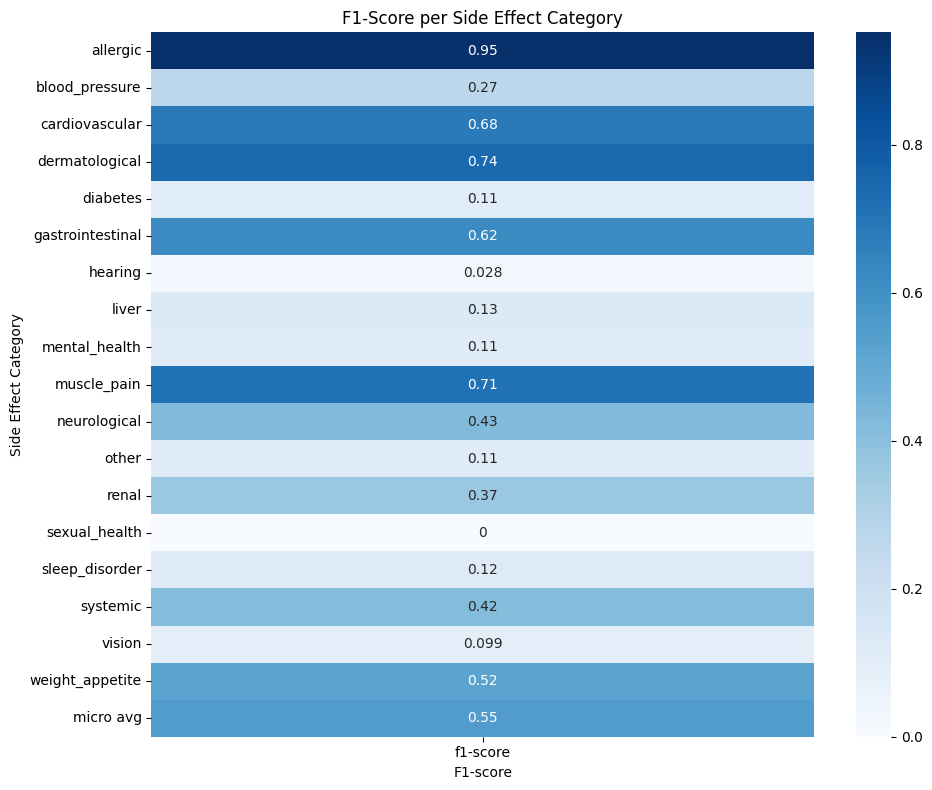

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generating classification report for side effect categories (multi-label)
report_se = classification_report(
	y1_true, y1_pred, target_names=mlb.classes_, output_dict=True
)
df_report_se = pd.DataFrame(report_se).transpose()

# Plot heatmap for F1-score
plt.figure(figsize=(10, 8))
sns.heatmap(df_report_se.iloc[:-3][['f1-score']], annot=True, cmap='Blues')
plt.title("F1-Score per Side Effect Category")
plt.ylabel("Side Effect Category")
plt.xlabel("F1-score")
plt.tight_layout()
plt.show()


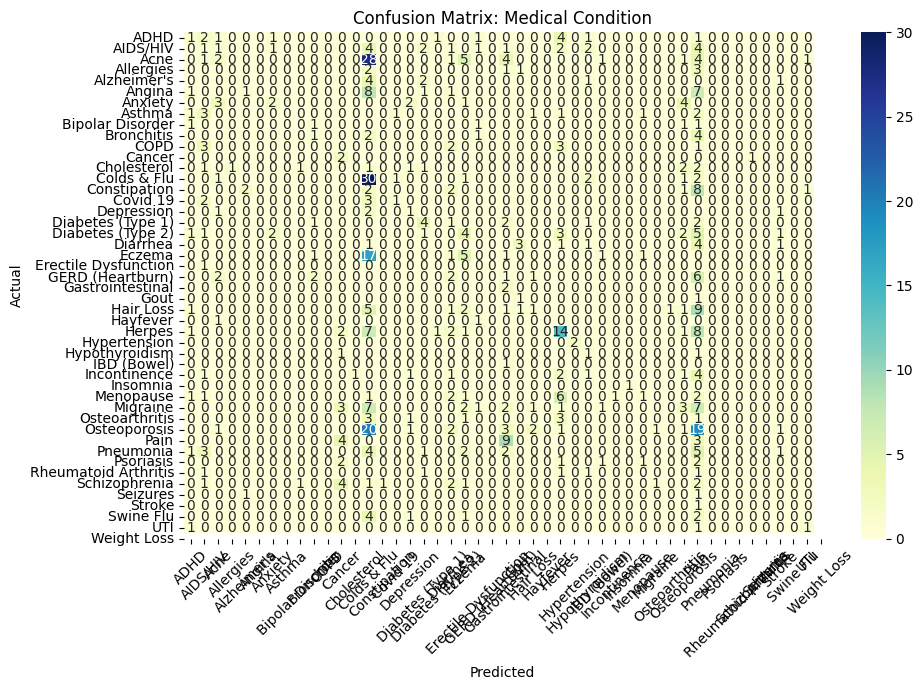

In [30]:
from sklearn.metrics import confusion_matrix

# ----- 3. Medical Condition: Confusion Matrix -----
conf_mat = confusion_matrix(y2_true, y2_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=le_medical.classes_,
            yticklabels=le_medical.classes_)
plt.title("Confusion Matrix: Medical Condition")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_20448\1208217721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f1_scores_se.values, y=f1_scores_se.index, palette="coolwarm")


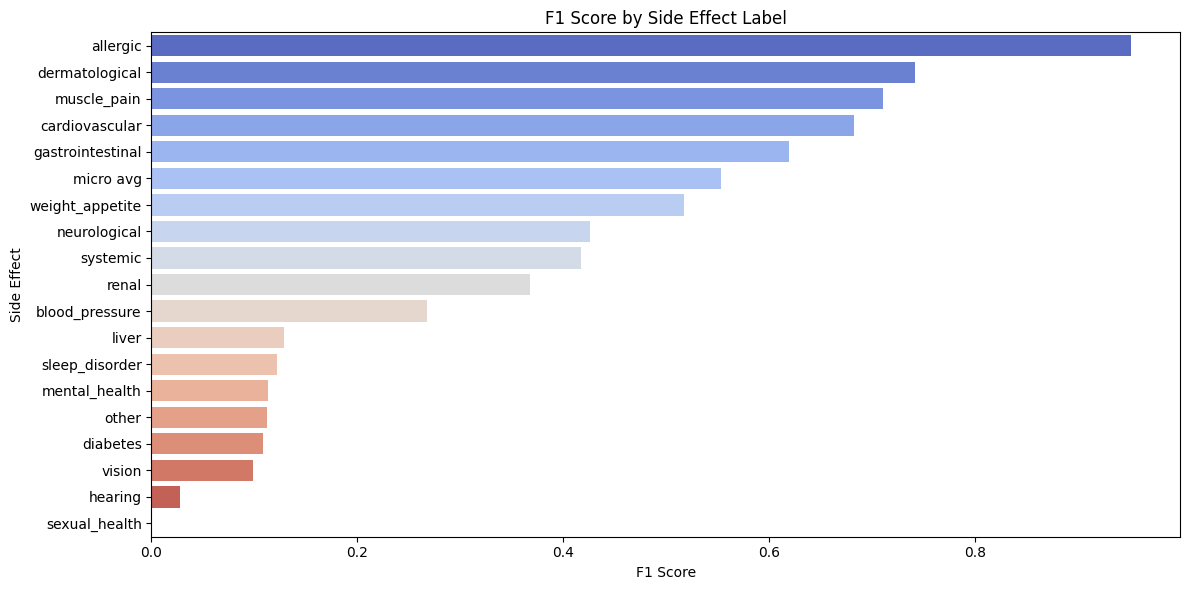

In [31]:
f1_scores_se = df_report_se.iloc[:-3]['f1-score'].sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=f1_scores_se.values, y=f1_scores_se.index, palette="coolwarm")
plt.title("F1 Score by Side Effect Label")
plt.xlabel("F1 Score")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.show()